In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('./data/eda.csv')

In [4]:
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,spark,excel,aws,min_salary,max_salary,avg_salary,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,1,0,53,91,72.0,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,63,112,87.5,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,1,0,80,90,85.0,data scientist,na,3461,0


In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'company_txt', 'job_state', 'same_state',
       'age', 'python_yn', 'R_yn', 'spark', 'excel', 'aws', 'min_salary',
       'max_salary', 'avg_salary', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [7]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

In [8]:
df_dum = pd.get_dummies(df_model)
df_dum.columns

Index(['avg_salary', 'Rating', 'num_comp', 'hourly', 'employer_provided',
       'same_state', 'age', 'python_yn', 'spark', 'aws',
       ...
       'job_simp_analyst', 'job_simp_data engineer', 'job_simp_data scientist',
       'job_simp_director', 'job_simp_manager', 'job_simp_mle', 'job_simp_na',
       'seniority_jr', 'seniority_na', 'seniority_senior'],
      dtype='object', length=178)

In [9]:
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary',axis=1)
y = df_dum['avg_salary'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
import statsmodels.api as sm

In [20]:
#Multiple linear regression

In [11]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     9.227
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           2.77e-86
Time:                        03:12:36   Log-Likelihood:                -3312.5
No. Observations:                 742   AIC:                             6911.
Df Residuals:                     599   BIC:                             7570.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.2259      6.388      6.766      0.000      30.680      55.772
Rating                                                3.6437      1.934      1.884      0.060      -0.155       7.443
num_comp                                              2.2854      0.870      2.627      0.009       0.577       3.994
hourly                                              -12.1816      9.201     -1.324      0.186     -30.252       5.889
employer_provided                                    31.6730     11.521      2.749      0.006       9.047      54.299
same_state                                            2.6728      2.622      1.019      0.308      -2.476       7.822
age                                                   0.0339      0.030      1.123      0.262      -0.025       0.093
python_yn                                             8.0797      2.526      3.198      0.001       3.118      13.041
spark                                                -0.5115      2.923     -0.175      0.861      -6.253       5.230
aws                                                   0.9811      2.740      0.358      0.720      -4.399       6.361
excel                                                -0.3990      2.272     -0.176      0.861      -4.861       4.063
desc_len                                             -0.0002      0.001     -0.252      0.801      -0.002       0.001
Size_-1                                              13.5666      8.639      1.570      0.117      -3.400      30.534
Size_1 to 50 employees                                1.1096      6.495      0.171      0.864     -11.647      13.866
Size_10000+ employees                                -3.4605      5.804     -0.596      0.551     -14.859       7.938
Size_1001 to 5000 employees                           6.1352      3.879      1.582      0.114      -1.483      13.753
Size_201 to 500 employees                             2.3256      3.871      0.601      0.548      -5.277       9.929
Size_5001 to 10000 employees                         -4.3859      5.445     -0.805      0.421     -15.080       6.308
Size_501 to 1000 employees                            2.4903      4.052      0.615      0.539      -5.468      10.448
Size_51 to 200 employees                              4.3365      4.410      0.983      0.326      -4.324      12.997
Size_Unknown                                         21.1086     14.022      1.505      0.133      -6.430      48.647
Type of ownership_-1                                 13.5666      8.639      1.570      0.117      -3.400      30.534
Type of ownership_College / University                5.7589     17.747      0.325      0.746     -29.095      40.612
Type of ownersh

In [12]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [15]:
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-377433385.5665795

In [19]:
# lasso regression 
lm_l = Lasso(alpha=.14)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-19.35485895795565

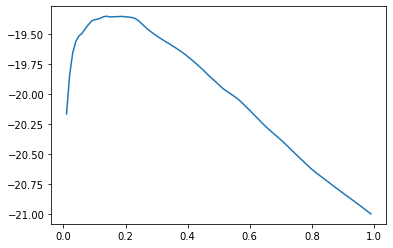

In [17]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [18]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
13,0.14,-19.354859


In [21]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-15.001419268830437

In [22]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [24]:
print(gs.best_score_)
print(gs.best_estimator_)

-14.89022446430153
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=220, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [25]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))

18.95020621168263
19.910380541570323
11.100000000000001


In [28]:
print(mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2))

14.165660190605387


In [29]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [30]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [31]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

52.63636363636363

In [32]:
list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 34.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
